In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("sentimentdataset.csv")
df.head()


Saving sentimentdataset.csv to sentimentdataset (1).csv


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
df.info()
print(df.isnull().sum())
print(df.columns)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User       

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


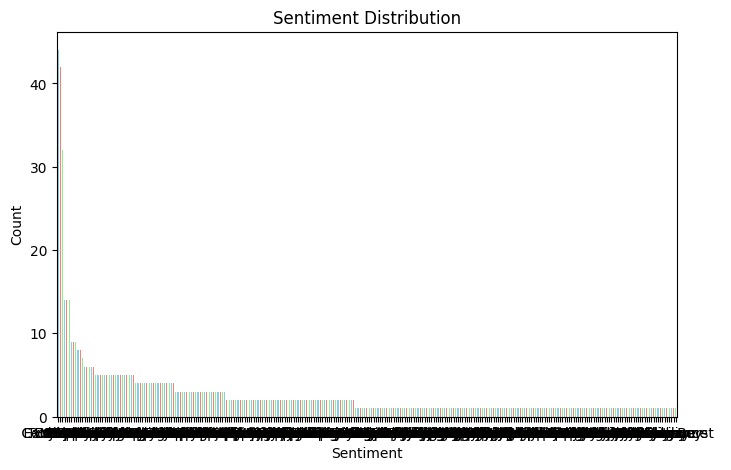

Sentiment Proportions (%):
 Sentiment
Positive           6.010929
Joy                5.737705
Excitement         4.371585
Neutral            1.912568
Contentment        1.912568
                     ...   
Adrenaline         0.136612
Harmony            0.136612
ArtisticBurst      0.136612
Radiance           0.136612
Elegance           0.136612
Name: count, Length: 279, dtype: float64


In [3]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

sentiment_proportions = sentiment_counts / len(df) * 100
print("Sentiment Proportions (%):\n", sentiment_proportions)


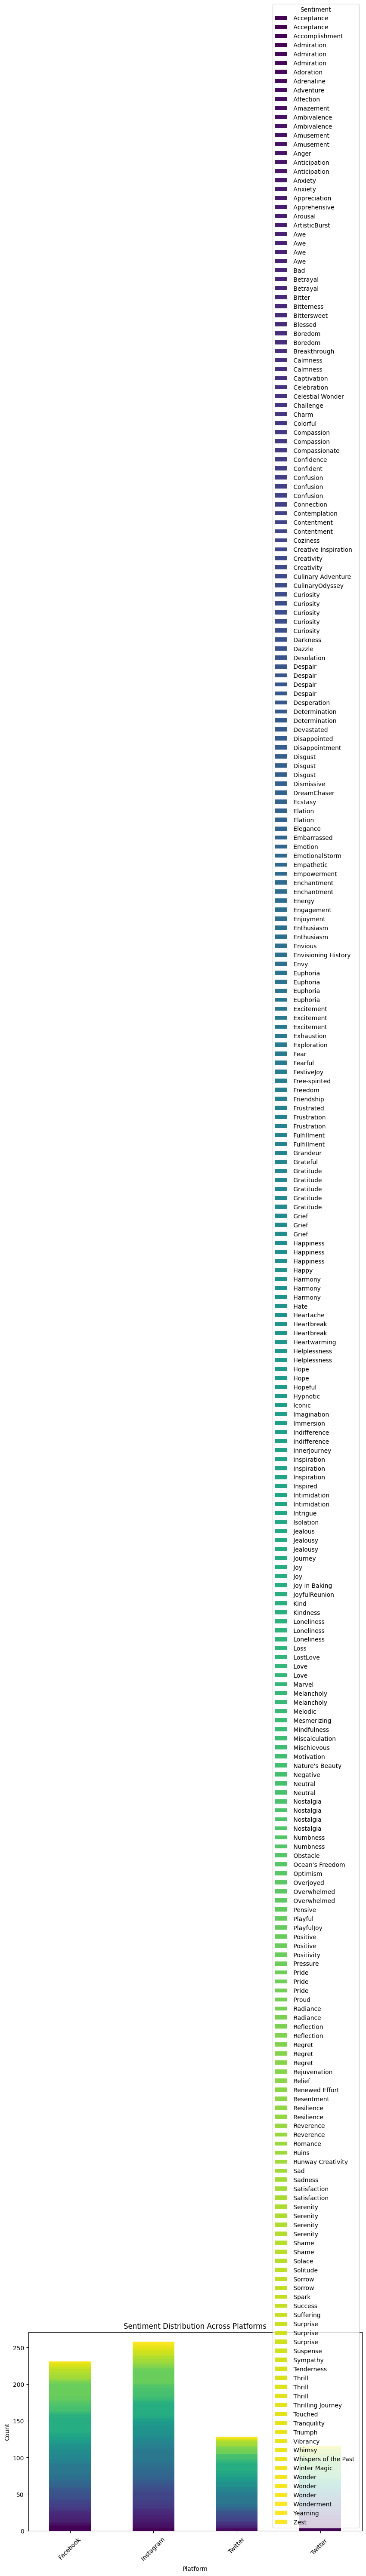

Platform-Based Sentiment Counts:
 Sentiment   Acceptance     Acceptance        Accomplishment   Admiration   \
Platform                                                                    
Facebook              2.0               2.0              3.0          NaN   
Instagram             NaN               2.0              NaN          1.0   
Twitter               NaN               NaN              NaN          NaN   
Twitter               1.0               1.0              NaN          NaN   

Sentiment   Admiration     Admiration      Adoration      Adrenaline       \
Platform                                                                    
Facebook              NaN             NaN            NaN              1.0   
Instagram             NaN             1.0            NaN              NaN   
Twitter               NaN             NaN            NaN              NaN   
Twitter               2.0             NaN            2.0              NaN   

Sentiment   Adventure   Affection      .

In [4]:
platform_sentiment = df.groupby(['Platform', 'Sentiment']).size().unstack()

platform_sentiment.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')
plt.title("Sentiment Distribution Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

print("Platform-Based Sentiment Counts:\n", platform_sentiment)


<ipython-input-5-cd80bd56c132>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Retweets', palette='Set2')


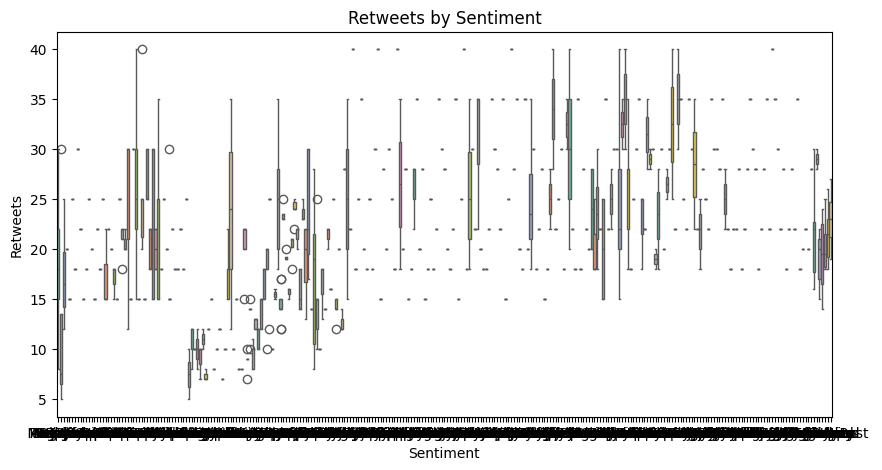

<ipython-input-5-cd80bd56c132>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Likes', palette='Set3')


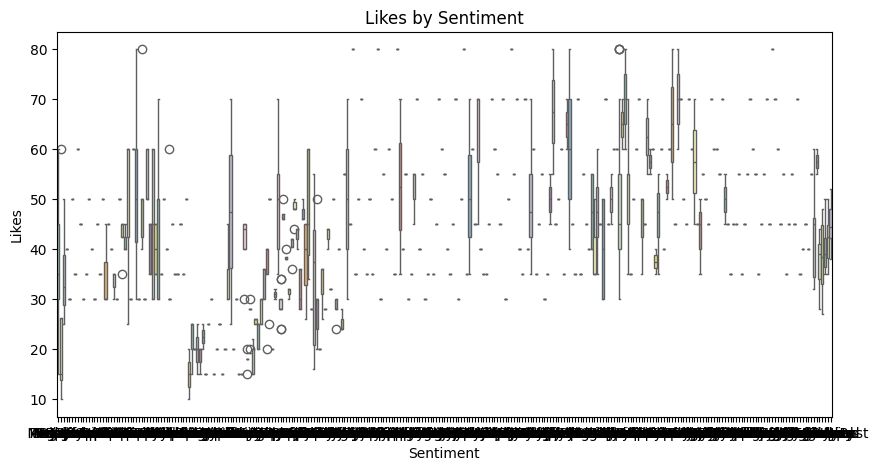

Average Retweets and Likes by Sentiment:
                    Retweets      Likes
Sentiment                             
Acceptance        17.333333  35.000000
Acceptance        16.800000  33.600000
Accomplishment    26.000000  51.666667
Admiration        22.000000  45.000000
Admiration        20.000000  40.000000
...                     ...        ...
Wonder            40.000000  80.000000
Wonder            40.000000  80.000000
Wonderment        35.000000  70.000000
Yearning          10.000000  20.000000
Zest              15.500000  31.000000

[279 rows x 2 columns]


In [5]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sentiment', y='Retweets', palette='Set2')
plt.title("Retweets by Sentiment")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sentiment', y='Likes', palette='Set3')
plt.title("Likes by Sentiment")
plt.show()

engagement_summary = df.groupby('Sentiment')[['Retweets', 'Likes']].mean()
print("Average Retweets and Likes by Sentiment:\n", engagement_summary)


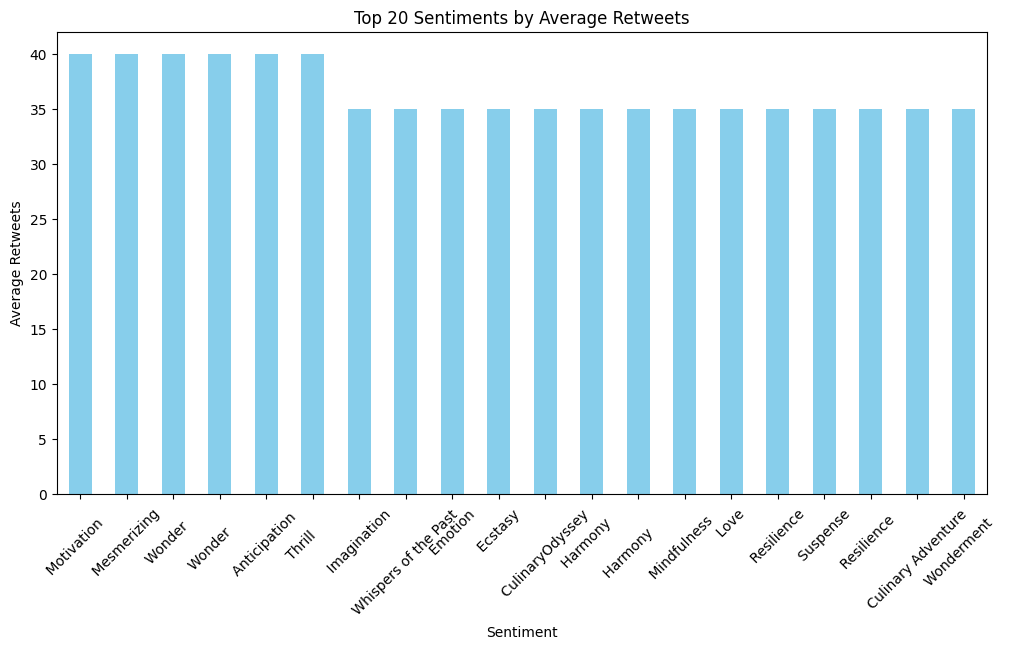

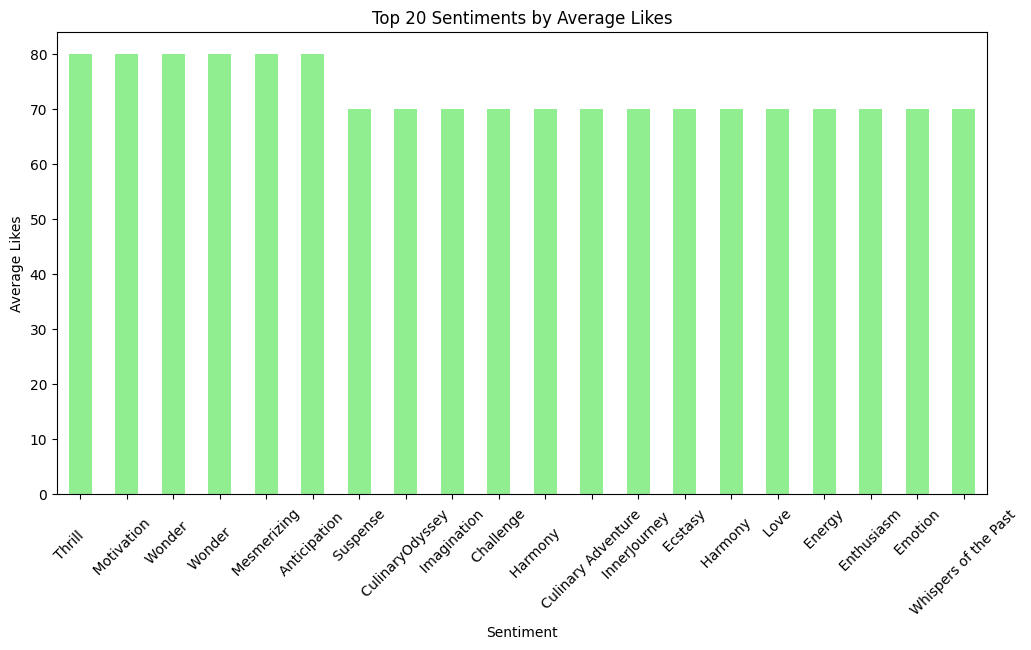

In [6]:
import matplotlib.pyplot as plt

engagement_summary = df.groupby('Sentiment')[['Retweets', 'Likes']].mean()

plt.figure(figsize=(12, 6))
engagement_summary['Retweets'].sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Sentiments by Average Retweets")
plt.xlabel("Sentiment")
plt.ylabel("Average Retweets")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
engagement_summary['Likes'].sort_values(ascending=False).head(20).plot(kind='bar', color='lightgreen')
plt.title("Top 20 Sentiments by Average Likes")
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()


In [7]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64


In [8]:
sentiment_mapping = {
    'Positive': 'Positive',
    'Joy': 'Positive',
    'Excitement': 'Positive',
    'Contentment': 'Positive',
    'Admiration': 'Positive',
    'Motivation': 'Positive',
    'Harmony': 'Positive',
    'Love': 'Positive',
    'Radiance': 'Positive',
    'Sadness': 'Negative',
    'Disappointment': 'Negative',
    'Fear': 'Negative',
    'Frustration': 'Negative',
    'Anger': 'Negative',
    'Neutral': 'Neutral',
    'Indifference': 'Neutral',
}

default_category = 'Neutral'


In [9]:
unmapped_sentiments = df[~df['Sentiment'].isin(sentiment_mapping.keys())]['Sentiment'].unique()
print("Unmapped Sentiments:\n", unmapped_sentiments)


Unmapped Sentiments:
 [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' '

In [10]:
sentiment_mapping = {
    'Positive': 'Positive',
    'Joy': 'Positive',
    'Excitement': 'Positive',
    'Contentment': 'Positive',
    'Happiness': 'Positive',
    'Admiration': 'Positive',
    'Motivation': 'Positive',
    'Love': 'Positive',
    'Amusement': 'Positive',
    'Gratitude': 'Positive',
    'Anticipation': 'Positive',
    'Euphoria': 'Positive',
    'Wonder': 'Positive',
    'Pride': 'Positive',
    'Harmony': 'Positive',
    'Thrill': 'Positive',
    'Enthusiasm': 'Positive',
    'Inspiration': 'Positive',
    'Satisfaction': 'Positive',
    'Negative': 'Negative',
    'Anger': 'Negative',
    'Fear': 'Negative',
    'Sadness': 'Negative',
    'Disgust': 'Negative',
    'Frustration': 'Negative',
    'Disappointment': 'Negative',
    'Despair': 'Negative',
    'Grief': 'Negative',
    'Heartbreak': 'Negative',
    'Loneliness': 'Negative',
    'Jealousy': 'Negative',
    'Anxiety': 'Negative',
    'Resentment': 'Negative',
    'Boredom': 'Negative',
    'Helplessness': 'Negative',
    'Regret': 'Negative',
    'Betrayal': 'Negative',
    'Sorrow': 'Negative',
    'Neutral': 'Neutral',
    'Indifference': 'Neutral',
    'Calmness': 'Neutral',
    'Serenity': 'Neutral',
    'Ambivalence': 'Neutral',
    'Curiosity': 'Neutral',
    'Acceptance': 'Neutral',
}

default_category = 'Neutral'


In [11]:
df['Refined_Sentiment'] = df['Sentiment'].map(sentiment_mapping).fillna(default_category)

print("Refined Sentiment Distribution:\n", df['Refined_Sentiment'].value_counts())


Refined Sentiment Distribution:
 Refined_Sentiment
Neutral    732
Name: count, dtype: int64


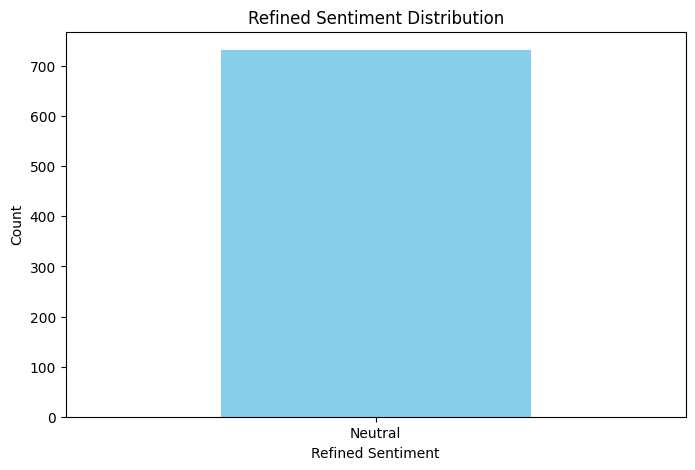

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['Refined_Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Refined Sentiment Distribution")
plt.xlabel("Refined Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [13]:
unmapped_sentiments = df[~df['Sentiment'].isin(sentiment_mapping.keys())]['Sentiment'].unique()
print("Unmapped Sentiments:\n", unmapped_sentiments)


Unmapped Sentiments:
 [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' '

In [14]:
def map_sentiment(sentiment):
    sentiment = sentiment.strip().lower()
    if any(word in sentiment for word in [
        'positive', 'joy', 'happiness', 'love', 'gratitude', 'excite',
        'admiration', 'pride', 'satisfaction', 'inspiration', 'wonder',
        'calmness', 'serenity', 'euphoria', 'thrill', 'motivation',
        'anticipation', 'amusement', 'playful', 'optimism'
    ]):
        return 'Positive'

    elif any(word in sentiment for word in [
        'negative', 'anger', 'fear', 'sad', 'frustration', 'anxiety',
        'disappointment', 'despair', 'grief', 'loneliness', 'regret',
        'betrayal', 'sorrow', 'melancholy', 'resentment', 'boredom',
        'jealousy', 'helplessness', 'disgust'
    ]):
        return 'Negative'

    elif any(word in sentiment for word in [
        'neutral', 'indifference', 'numbness', 'ambivalence', 'calmness'
    ]):
        return 'Neutral'

    return 'Neutral'

df['Refined_Sentiment'] = df['Sentiment'].apply(map_sentiment)


Refined Sentiment Distribution:
 Refined_Sentiment
Neutral     404
Positive    231
Negative     97
Name: count, dtype: int64


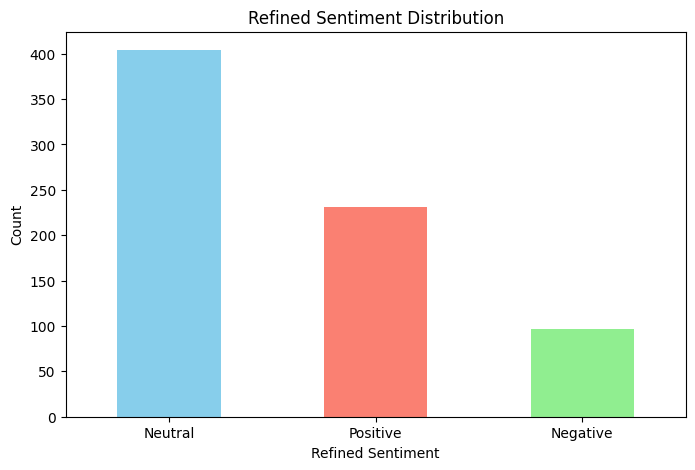

In [15]:
print("Refined Sentiment Distribution:\n", df['Refined_Sentiment'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['Refined_Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Refined Sentiment Distribution")
plt.xlabel("Refined Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [16]:

!pip install nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
import nltk
import shutil

shutil.rmtree('/root/nltk_data', ignore_errors=True)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
import re

def preprocess_text_simple(text):

    text = text.lower()

    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    text = re.sub(r'\@\w+|\#', '', text)

    text = re.sub(r"[^a-zA-Z\s]", '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Text'] = df['Text'].apply(preprocess_text_simple)

print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                                 Cleaned_Text  
0        enjoying a beautiful day at the park  
1           traffic was terrible this morning  
2            just finished an amazing workout  
3  excited about the upcoming weekend getaway  
4  trying out a new recipe for dinner tonight  


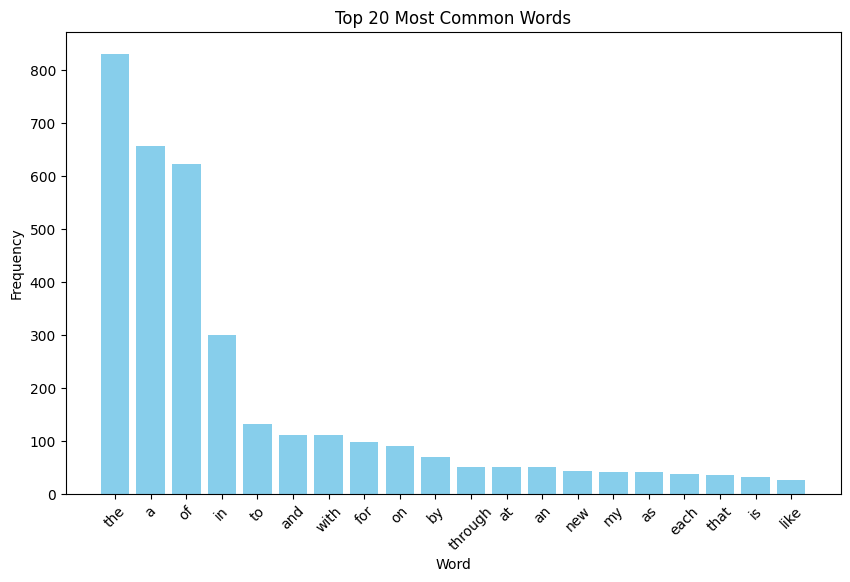

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(df['Cleaned_Text']).split()

word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


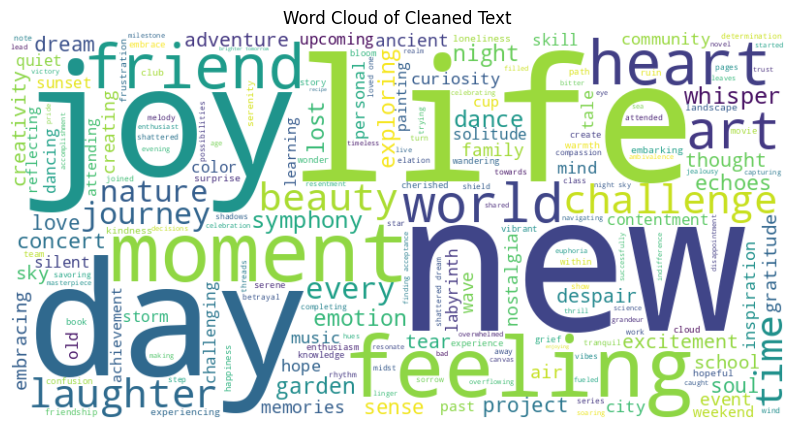

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


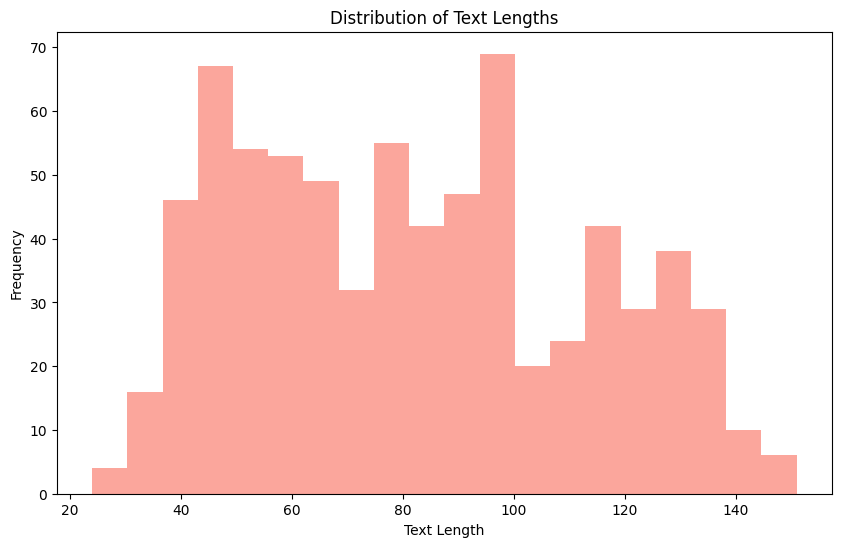

In [21]:

df['Text_Length'] = df['Cleaned_Text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['Text_Length'], bins=20, color='salmon', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


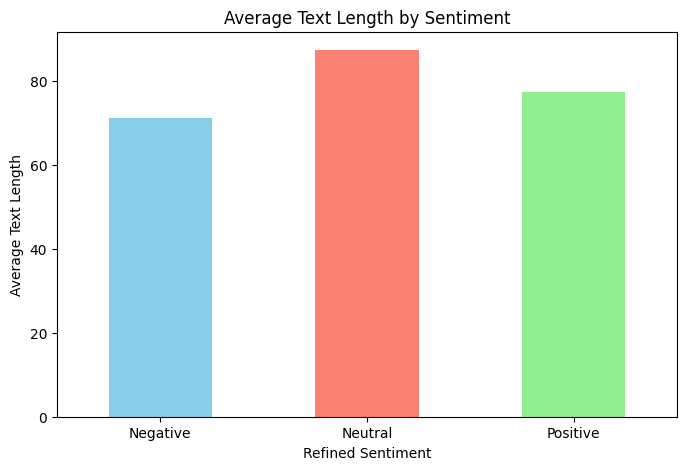

In [22]:

avg_text_length = df.groupby('Refined_Sentiment')['Text_Length'].mean()

avg_text_length.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(8, 5))
plt.title('Average Text Length by Sentiment')
plt.xlabel('Refined Sentiment')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)
plt.show()


In [23]:

for sentiment in df['Refined_Sentiment'].unique():
    sentiment_words = ' '.join(df[df['Refined_Sentiment'] == sentiment]['Cleaned_Text']).split()
    sentiment_word_freq = Counter(sentiment_words).most_common(10)
    print(f"Top words for {sentiment} sentiment:\n", sentiment_word_freq, "\n")


Top words for Positive sentiment:
 [('the', 237), ('a', 204), ('of', 141), ('in', 69), ('for', 46), ('and', 40), ('with', 37), ('to', 37), ('on', 30), ('new', 22)] 

Top words for Negative sentiment:
 [('the', 97), ('a', 72), ('of', 72), ('in', 43), ('to', 15), ('despair', 12), ('with', 11), ('by', 10), ('my', 10), ('feeling', 9)] 

Top words for Neutral sentiment:
 [('the', 496), ('of', 410), ('a', 380), ('in', 188), ('to', 81), ('and', 67), ('with', 63), ('on', 53), ('for', 48), ('by', 48)] 



In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

df['Cleaned_Text_NoStopwords'] = df['Cleaned_Text'].apply(remove_stopwords)

print(df[['Cleaned_Text', 'Cleaned_Text_NoStopwords']].head())


                                 Cleaned_Text  \
0        enjoying a beautiful day at the park   
1           traffic was terrible this morning   
2            just finished an amazing workout   
3  excited about the upcoming weekend getaway   
4  trying out a new recipe for dinner tonight   

           Cleaned_Text_NoStopwords  
0       enjoying beautiful day park  
1          traffic terrible morning  
2     just finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Text_NoStopwords'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.head())


   abyss  acceptance  accidentally  accomplishment  achievement  achieving  \
0    0.0         0.0           0.0             0.0          0.0        0.0   
1    0.0         0.0           0.0             0.0          0.0        0.0   
2    0.0         0.0           0.0             0.0          0.0        0.0   
3    0.0         0.0           0.0             0.0          0.0        0.0   
4    0.0         0.0           0.0             0.0          0.0        0.0   

   action  acts  adventure  adventures  ...  wonder  wonders  work   workout  \
0     0.0   0.0        0.0         0.0  ...     0.0      0.0   0.0  0.000000   
1     0.0   0.0        0.0         0.0  ...     0.0      0.0   0.0  0.000000   
2     0.0   0.0        0.0         0.0  ...     0.0      0.0   0.0  0.738866   
3     0.0   0.0        0.0         0.0  ...     0.0      0.0   0.0  0.000000   
4     0.0   0.0        0.0         0.0  ...     0.0      0.0   0.0  0.000000   

   world  wrapped  writing  wrong  yearning  years

In [26]:

tfidf_df['Refined_Sentiment'] = df['Refined_Sentiment']
tfidf_df.to_csv("tfidf_features.csv", index=False)

print("TF-IDF features saved as tfidf_features.csv")


TF-IDF features saved as tfidf_features.csv


In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

reduced_df = pd.DataFrame(tfidf_reduced, columns=[f"Component_{i}" for i in range(1, 101)])

reduced_df['Refined_Sentiment'] = df['Refined_Sentiment']

reduced_df.to_csv("reduced_tfidf_features.csv", index=False)
print("Reduced TF-IDF features saved as reduced_tfidf_features.csv")


Reduced TF-IDF features saved as reduced_tfidf_features.csv


In [28]:

df['Text_Length'] = df['Cleaned_Text_NoStopwords'].apply(len)

df['Word_Count'] = df['Cleaned_Text_NoStopwords'].apply(lambda x: len(x.split()))

reduced_df['Text_Length'] = df['Text_Length']
reduced_df['Word_Count'] = df['Word_Count']

reduced_df.to_csv("enhanced_tfidf_features.csv", index=False)
print("Enhanced features saved as enhanced_tfidf_features.csv")


Enhanced features saved as enhanced_tfidf_features.csv


In [29]:
from textblob import TextBlob

df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['Text_Length'] = df['Text'].apply(len)
df['Word_Count'] = df['Text'].apply(lambda x: len(x.split()))


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())


In [32]:
import numpy as np

numerical_features = df[['Polarity', 'Subjectivity', 'Text_Length', 'Word_Count']].values
combined_features = np.hstack([numerical_features, tfidf_reduced])

print("Combined Feature Shape:", combined_features.shape)


Combined Feature Shape: (732, 104)


In [33]:
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Refined_Sentiment', 'Cleaned_Text', 'Text_Length',
       'Cleaned_Text_NoStopwords', 'Word_Count', 'Polarity', 'Subjectivity'],
      dtype='object')


In [34]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = list(ENGLISH_STOP_WORDS)


In [35]:
import re
import string

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)


In [36]:

df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                       Cleaned_Text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2   just finished amazing workout 💪  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


In [37]:
def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\d+', '', text)

    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)


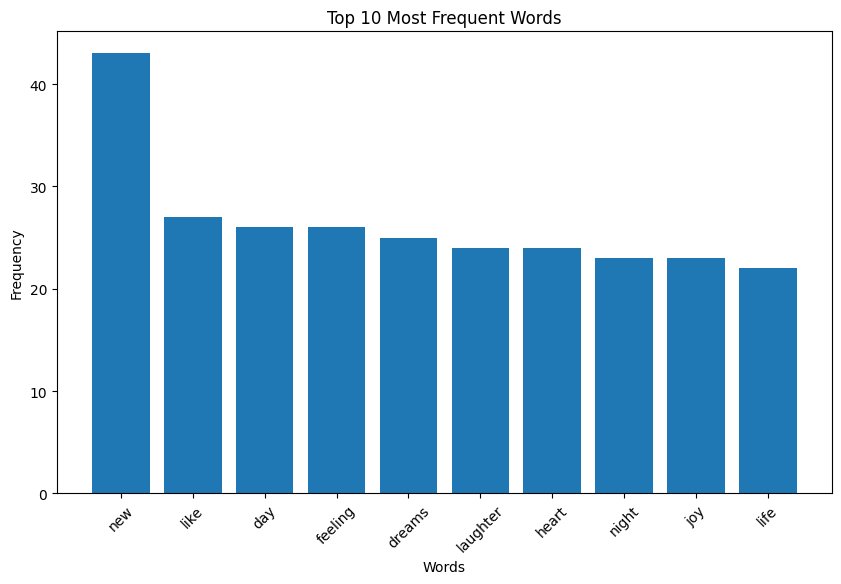

,Word,Frequency
0,new,43
1,like,27
2,day,26
3,feeling,26
4,dreams,25
5,laughter,24
6,heart,24
7,night,23
8,joy,23
9,life,22


In [38]:
from collections import Counter
import matplotlib.pyplot as plt

all_text = " ".join(df['Cleaned_Text'])

words = all_text.split()

word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'])
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

common_words_df


In [39]:
from gensim.models import Word2Vec
import numpy as np

tokenized_sentences = df['Cleaned_Text'].apply(lambda x: x.split())

word2vec_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

def get_avg_word2vec(tokens, model, vector_size):
    """Generate average Word2Vec embedding for a document."""
    if len(tokens) < 1:
        return np.zeros(vector_size)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

df['Word2Vec_Embedding'] = tokenized_sentences.apply(
    lambda tokens: get_avg_word2vec(tokens, word2vec_model, 100)
)

print("Sample Word2Vec Embedding:")
print(df['Word2Vec_Embedding'].head())


Sample Word2Vec Embedding:
0    [0.0011624405, 0.0056723845, -0.006476747, 0.0...
1    [0.0009492189, -0.0014227104, 0.006712439, 0.0...
2    [-0.002791608, 0.0028487933, 0.0021674642, -0....
3    [-0.001049772, -0.002649448, -0.0027652225, 0....
4    [0.0003483006, 0.0014286427, -0.002338925, 0.0...
Name: Word2Vec_Embedding, dtype: object


In [40]:
from sklearn.model_selection import train_test_split
import numpy as np

X_word2vec = np.stack(df['Word2Vec_Embedding'].values)
y_labels = df['Refined_Sentiment']

X_train_word2vec, X_test_word2vec, y_train, y_test = train_test_split(
    X_word2vec, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

X_train_word2vec.shape, X_test_word2vec.shape, len(y_train), len(y_test)


((585, 100), (147, 100), 585, 147)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_word2vec, y_train)

y_test_pred = model.predict(X_test_word2vec)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.5510
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        20
     Neutral       0.55      1.00      0.71        81
    Positive       0.00      0.00      0.00        46

    accuracy                           0.55       147
   macro avg       0.18      0.33      0.24       147
weighted avg       0.30      0.55      0.39       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_word2vec, y_train)

print("Class distribution after random oversampling:", Counter(y_train_balanced))


Class distribution after random oversampling: Counter({'Negative': 323, 'Neutral': 323, 'Positive': 323})


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_balanced, y_train_balanced)

y_pred = logistic_model.predict(X_test_word2vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.43537414965986393
Classification Report:
               precision    recall  f1-score   support

    Negative       0.22      0.50      0.31        20
     Neutral       0.62      0.43      0.51        81
    Positive       0.41      0.41      0.41        46

    accuracy                           0.44       147
   macro avg       0.42      0.45      0.41       147
weighted avg       0.50      0.44      0.45       147

Confusion Matrix:
 [[10  7  3]
 [22 35 24]
 [13 14 19]]


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Text']).toarray()


In [45]:
import numpy as np

additional_features = df[['Polarity', 'Subjectivity', 'Text_Length', 'Word_Count']].values
X_combined = np.hstack((X_tfidf, additional_features))


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, df['Refined_Sentiment'])


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7613168724279835
              precision    recall  f1-score   support

    Negative       0.84      0.91      0.88        82
     Neutral       0.74      0.56      0.64        91
    Positive       0.69      0.84      0.76        70

    accuracy                           0.76       243
   macro avg       0.76      0.77      0.76       243
weighted avg       0.76      0.76      0.75       243



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[75  7  0]
 [14 51 26]
 [ 0 11 59]]
              precision    recall  f1-score   support

    Negative       0.84      0.91      0.88        82
     Neutral       0.74      0.56      0.64        91
    Positive       0.69      0.84      0.76        70

    accuracy                           0.76       243
   macro avg       0.76      0.77      0.76       243
weighted avg       0.76      0.76      0.75       243



In [49]:
model = LogisticRegression(max_iter=500)


In [50]:
y_combined = y_resampled


In [51]:
print(X_combined.shape, len(y_combined))


(732, 1004) 1212


In [52]:
y_original = df['Refined_Sentiment']
print(y_original.shape)


(732,)


In [53]:
y_original = y_original.iloc[:X_combined.shape[0]]


In [54]:
y_combined = y_original


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

scores = cross_val_score(model, X_combined, y_combined, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy (increased iterations): ", scores.mean())


Cross-Validation Accuracy (increased iterations):  0.5871586990960769


In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42))
])

cv_scores = cross_val_score(pipeline, X_combined, y_combined, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy (Logistic Regression):", cv_scores.mean())


Cross-Validation Accuracy (Logistic Regression): 0.6911937377690803


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train_scaled, y_train)

print("Model fitted successfully.")


Model fitted successfully.


Test Accuracy (with balanced class weights): 0.8641975308641975
Classification Report (with balanced class weights):
               precision    recall  f1-score   support

    Negative       0.89      1.00      0.94        82
     Neutral       0.94      0.68      0.79        91
    Positive       0.78      0.94      0.85        70

    accuracy                           0.86       243
   macro avg       0.87      0.87      0.86       243
weighted avg       0.88      0.86      0.86       243



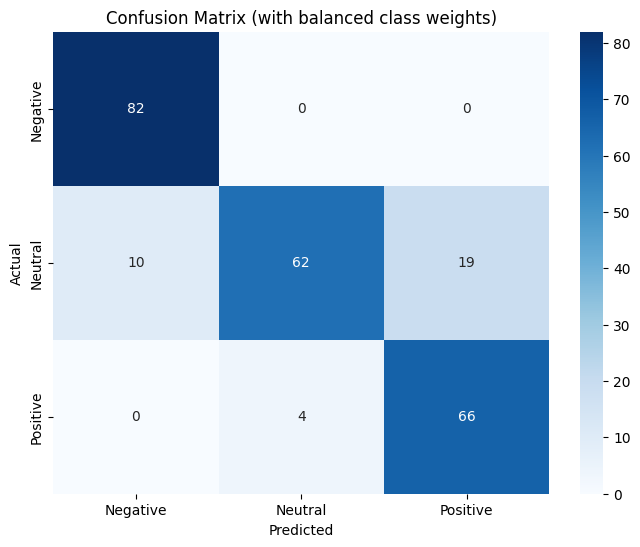

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

balanced_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

balanced_model.fit(X_train_scaled, y_train)

test_accuracy = balanced_model.score(X_test_scaled, y_test)
y_test_pred = balanced_model.predict(X_test_scaled)

print("Test Accuracy (with balanced class weights):", test_accuracy)
print("Classification Report (with balanced class weights):\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=balanced_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_model.classes_, yticklabels=balanced_model.classes_)
plt.title("Confusion Matrix (with balanced class weights)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [59]:
import joblib
joblib.dump(balanced_model, 'balanced_logistic_regression_model.pkl')
print("Model saved successfully.")


Model saved successfully.


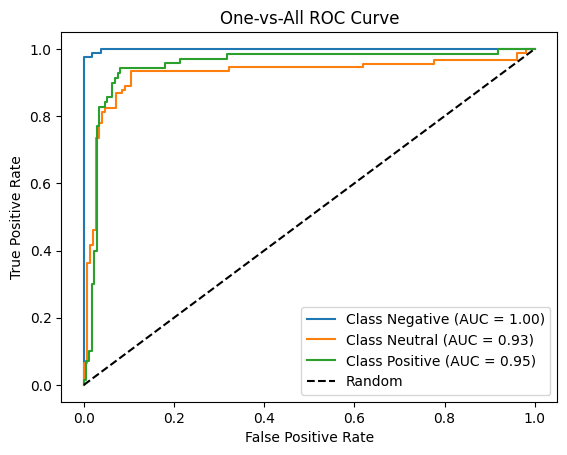

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_probs = balanced_model.predict_proba(X_test_scaled)
for i, class_label in enumerate(balanced_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_test_probs[:, i])
    auc_score = roc_auc_score((y_test == class_label).astype(int), y_test_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("One-vs-All ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [61]:
import joblib

loaded_model = joblib.load('balanced_logistic_regression_model.pkl')
print("Model loaded successfully.")


Model loaded successfully.


In [62]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
dataset = pd.read_csv("sentimentdataset.csv")


Saving sentimentdataset.csv to sentimentdataset (2).csv


In [63]:
!pip install transformers datasets torch scikit-learn


In [64]:

def simplify_sentiment(sentiment):
    sentiment = sentiment.strip().lower()
    if sentiment in ["positive", "happiness", "joy", "excitement", "gratitude", "love", "admiration"]:
        return 0  # Positive
    elif sentiment in ["negative", "anger", "fear", "sadness", "frustration", "disgust", "regret"]:
        return 1  # Negative
    elif sentiment in ["neutral", "calmness", "indifference"]:
        return 2  # Neutral
    else:
        return None

dataset['Sentiment'] = dataset['Sentiment'].apply(simplify_sentiment)
dataset = dataset.dropna(subset=['Sentiment'])

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset[['Text', 'Sentiment']], test_size=0.2, random_state=42)


In [65]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_data(batch):
    return tokenizer(batch['Text'], padding=True, truncation=True, max_length=256)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

train_data_tokenized = tokenizer(list(train_data['Text']), truncation=True, padding=True, max_length=256)
test_data_tokenized = tokenizer(list(test_data['Text']), truncation=True, padding=True, max_length=256)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [66]:
import torch
from torch.utils.data import DataLoader, Dataset

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_data_tokenized, list(train_data['Sentiment']))
test_dataset = SentimentDataset(test_data_tokenized, list(test_data['Sentiment']))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [67]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


In [68]:
print(train_dataset[0]['labels'])


tensor(1.)


In [69]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


In [70]:
print(train_dataset[0]['labels'])
print(type(train_dataset[0]['labels']))


tensor(1.)
<class 'torch.Tensor'>


In [71]:

train_labels = [int(label) for label in train_data['Sentiment']]
test_labels = [int(label) for label in test_data['Sentiment']]

train_dataset = SentimentDataset(train_data_tokenized, train_labels)
test_dataset = SentimentDataset(test_data_tokenized, test_labels)


In [72]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:

train_labels = train_data['Sentiment'].astype(int).tolist()
test_labels = test_data['Sentiment'].astype(int).tolist()

train_dataset = SentimentDataset(train_data_tokenized, train_labels)
test_dataset = SentimentDataset(test_data_tokenized, test_labels)


In [74]:
print(train_dataset[0]['labels'])
print(type(train_dataset[0]['labels']))


tensor(1)
<class 'torch.Tensor'>


In [75]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:

batch = next(iter(DataLoader(train_dataset, batch_size=16)))
outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], labels=batch['labels'])

print("Logits shape:", outputs.logits.shape)
print("Loss:", outputs.loss)


Logits shape: torch.Size([16, 3])
Loss: tensor(1.0634, grad_fn=<NllLossBackward0>)


In [77]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="./logs",
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


In [78]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,0.847108
2,No log,0.796863
3,No log,0.777115


TrainOutput(global_step=33, training_loss=0.7737107132420395, metrics={'train_runtime': 172.8451, 'train_samples_per_second': 2.916, 'train_steps_per_second': 0.191, 'total_flos': 5085596919312.0, 'train_loss': 0.7737107132420395, 'epoch': 3.0})

In [79]:

metrics = trainer.evaluate()
print(metrics)


{'eval_loss': 0.7771154642105103, 'eval_runtime': 1.9478, 'eval_samples_per_second': 22.076, 'eval_steps_per_second': 1.54, 'epoch': 3.0}


In [80]:
from transformers import pipeline

sentiment_analysis = pipeline("text-classification", model=model, tokenizer=tokenizer)

examples = [
    "This is the best day of my life!",
    "I am very disappointed with this product.",
    "It's an okay experience, not too bad, not too great."
]

results = sentiment_analysis(examples)
for example, result in zip(examples, results):
    print(f"Text: {example}\nPrediction: {result['label']} (Score: {result['score']:.4f})\n")


Text: This is the best day of my life!
Prediction: LABEL_0 (Score: 0.7280)

Text: I am very disappointed with this product.
Prediction: LABEL_0 (Score: 0.6217)

Text: It's an okay experience, not too bad, not too great.
Prediction: LABEL_0 (Score: 0.6810)



In [81]:
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [82]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

loaded_model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
loaded_tokenizer = AutoTokenizer.from_pretrained("./saved_model")


In [83]:

print(model.config.id2label)


{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2'}


In [84]:

metrics = trainer.evaluate()
print(metrics)


{'eval_loss': 0.7771154642105103, 'eval_runtime': 1.9638, 'eval_samples_per_second': 21.896, 'eval_steps_per_second': 1.528, 'epoch': 3.0}


In [85]:
label_mapping = {0: "Positive", 1: "Negative", 2: "Neutral"}

examples = [
    "This is the best day of my life!",
    "I am very disappointed with this product.",
    "It's an okay experience, not too bad, not too great."
]

results = sentiment_analysis(examples)

for example, result in zip(examples, results):
    sentiment = label_mapping[int(result['label'].split('_')[1])]
    print(f"Text: {example}\nPrediction: {sentiment} (Score: {result['score']:.4f})\n")


Text: This is the best day of my life!
Prediction: Positive (Score: 0.7280)

Text: I am very disappointed with this product.
Prediction: Positive (Score: 0.6217)

Text: It's an okay experience, not too bad, not too great.
Prediction: Positive (Score: 0.6810)



In [86]:
from sklearn.metrics import classification_report
import numpy as np

preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)
y_true = test_data['Sentiment'].tolist()

print(classification_report(y_true, y_pred, target_names=["Positive", "Negative", "Neutral"]))


              precision    recall  f1-score   support

    Positive       0.67      1.00      0.81        29
    Negative       0.00      0.00      0.00         4
     Neutral       0.00      0.00      0.00        10

    accuracy                           0.67        43
   macro avg       0.22      0.33      0.27        43
weighted avg       0.45      0.67      0.54        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:

class_weights = torch.tensor(class_weights, dtype=torch.float).to("cpu")  # or simply omit .to("cpu")
print("Class weights:", class_weights)


Class weights: tensor([0.4409, 2.4348, 3.1111])


In [98]:
from transformers import DistilBertForSequenceClassification
import torch.nn as nn

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

class CustomLossModel(nn.Module):
    def __init__(self, model, class_weights):
        super(CustomLossModel, self).__init__()
        self.model = model
        self.class_weights = class_weights
        self.loss_fn = nn.CrossEntropyLoss(weight=self.class_weights)

    def forward(self, input_ids, attention_mask, labels):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = self.loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

custom_model = CustomLossModel(model, class_weights)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="./logs",
    report_to="none",
)

trainer = Trainer(
    model=custom_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


In [100]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,1.073896
2,No log,1.005887
3,No log,0.936536
4,No log,0.898985
5,No log,0.889890


TrainOutput(global_step=55, training_loss=1.00239389592951, metrics={'train_runtime': 213.104, 'train_samples_per_second': 3.942, 'train_steps_per_second': 0.258, 'total_flos': 0.0, 'train_loss': 1.00239389592951, 'epoch': 5.0})

In [101]:
from sklearn.metrics import classification_report
import numpy as np

preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)
y_true = test_data['Sentiment'].tolist()

print(classification_report(y_true, y_pred, target_names=["Positive", "Negative", "Neutral"]))


              precision    recall  f1-score   support

    Positive       1.00      0.59      0.74        29
    Negative       0.38      0.75      0.50         4
     Neutral       0.50      0.90      0.64        10

    accuracy                           0.67        43
   macro avg       0.62      0.75      0.63        43
weighted avg       0.83      0.67      0.69        43



In [102]:
examples = [
    "I absolutely love this product!",
    "The experience was terrible and disappointing.",
    "It's just okay, nothing special.",
    "Amazing service! Highly recommended.",
    "The quality of this item is very poor."
]

results = sentiment_analysis(examples)
for example, result in zip(examples, results):
    print(f"Text: {example}\nPrediction: {result['label']} (Score: {result['score']:.4f})\n")


Text: I absolutely love this product!
Prediction: LABEL_0 (Score: 0.7416)

Text: The experience was terrible and disappointing.
Prediction: LABEL_0 (Score: 0.5795)

Text: It's just okay, nothing special.
Prediction: LABEL_0 (Score: 0.6713)

Text: Amazing service! Highly recommended.
Prediction: LABEL_0 (Score: 0.7821)

Text: The quality of this item is very poor.
Prediction: LABEL_0 (Score: 0.6076)



In [103]:
examples = [
    "I had the worst experience ever.",
    "This product is amazing and works perfectly!",
    "It's okay, not great but not bad either.",
    "Highly disappointed with the quality.",
    "Very neutral feeling about this decision."
]
results = sentiment_analysis(examples)
for example, result in zip(examples, results):
    print(f"Text: {example}\nPrediction: {result['label']} (Score: {result['score']:.4f})\n")


Text: I had the worst experience ever.
Prediction: LABEL_0 (Score: 0.6099)

Text: This product is amazing and works perfectly!
Prediction: LABEL_0 (Score: 0.7471)

Text: It's okay, not great but not bad either.
Prediction: LABEL_0 (Score: 0.6511)

Text: Highly disappointed with the quality.
Prediction: LABEL_0 (Score: 0.6657)

Text: Very neutral feeling about this decision.
Prediction: LABEL_0 (Score: 0.6675)



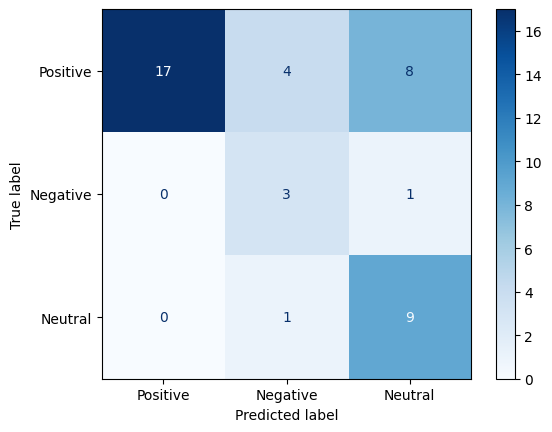

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative", "Neutral"])
disp.plot(cmap="Blues")


In [105]:

model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")


('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/vocab.txt',
 './sentiment_model/added_tokens.json',
 './sentiment_model/tokenizer.json')

In [106]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = train_data['Text']
y = train_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [108]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:

history = model.fit(
    X_train_pad, y_train_onehot,
    validation_data=(X_test_pad, y_test_onehot),
    epochs=15,
    batch_size=32
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5286 - loss: 1.0531 - val_accuracy: 0.7059 - val_loss: 0.8603
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7554 - loss: 0.7926 - val_accuracy: 0.7059 - val_loss: 0.9266
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7554 - loss: 0.8033 - val_accuracy: 0.7059 - val_loss: 0.8167
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.7554 - loss: 0.7408 - val_accuracy: 0.7059 - val_loss: 0.8195
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.7554 - loss: 0.7549 - val_accuracy: 0.7059 - val_loss: 0.8303
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7554 - loss: 0.7778 - val_accuracy: 0.7059 - val_loss: 0.8366
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7554 - loss: 0.7708 - val_accuracy: 0.7059 - val_loss: 0.8328
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7554 - loss: 0.7741 - val_accuracy: 0.7059 - val_loss:

In [111]:

loss, accuracy = model.evaluate(X_test_pad, y_test_onehot)
print(f"LSTM Test Accuracy: {accuracy:.2f}")

y_pred_probs = model.predict(X_test_pad)
y_pred = y_pred_probs.argmax(axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7102 - loss: 0.8219
LSTM Test Accuracy: 0.71
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [112]:
from sklearn.metrics import classification_report, confusion_matrix


y_test_labels = y_test.to_numpy()
print(classification_report(y_test_labels, y_pred, target_names=["Positive", "Negative", "Neutral"]))


              precision    recall  f1-score   support

    Positive       0.71      1.00      0.83        24
    Negative       0.00      0.00      0.00         6
     Neutral       0.00      0.00      0.00         4

    accuracy                           0.71        34
   macro avg       0.24      0.33      0.28        34
weighted avg       0.50      0.71      0.58        34



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_label = torch.argmax(predictions, dim=1).item()
    labels = {0: "Positive", 1: "Negative", 2: "Neutral"}
    return labels[predicted_label], predictions[0][predicted_label].item()

text = "This is a great product!"
label, confidence = predict_sentiment(text)
print(f"Text: {text}\nLabel: {label}, Confidence: {confidence:.2f}")


Text: This is a great product!
Label: Negative, Confidence: 0.37


In [114]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Transformer Model Accuracy: {accuracy * 100:.2f}%")


Transformer Model Accuracy: 70.59%
